In [125]:
# Setup

import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np

In [126]:
# Read the NBA play by play data into a DataFrame
df_23 = pd.read_csv('data/pbp2023.csv')
df_all = pd.read_csv('data/pbpALL.csv')

In [127]:
# Get dataframe of only shots taken
shots_df = df_all[df_all["type"].isin(["Missed Shot","Made Shot"])]

In [128]:
# get dataframe of only fouls
fouls_df = df_all[df_all["type"]=="Foul"]

# filter df for relevant fouls (personal, shooting), ignore OT for this investigation
fouls_df = fouls_df[fouls_df["subtype"].isin(["Personal","Shooting"])]
fouls_df = fouls_df[fouls_df["period"].isin([1,2,3,4])]

In [129]:
# get per-quarter numbers
grouped = fouls_df.groupby(["period","subtype","season"]).size().unstack()

foul_sums_temp = fouls_df[["subtype","season"]]
foul_sums = foul_sums_temp.groupby(["subtype","season"]).size().unstack()

print(grouped)
print(foul_sums)


season           1997  1998  1999  2000  2001  2002  2003  2004  2005  2006  \
period subtype                                                                
1      Personal  4154  4073  2634  4798  4250  3948  4079  3820  4209  4185   
       Shooting  5172  5214  3291  5052  5171  5091  5273  5186  5804  5970   
2      Personal  5551  5402  3220  6065  5560  4772  5179  5187  5537  5617   
       Shooting  6198  6445  4004  6037  6229  6039  6146  6230  6957  6941   
3      Personal  5145  5173  3215  5650  5262  4776  5215  4847  5377  5390   
       Shooting  6316  6529  3986  6106  6040  6267  6384  6445  7030  7040   
4      Personal  7325  7295  4513  7750  7021  6627  6796  6882  7153  7189   
       Shooting  7046  7429  4381  6693  6644  6439  6753  6615  7452  7682   

season           ...  2014  2015  2016  2017  2018  2019  2020  2021  2022  \
period subtype   ...                                                         
1      Personal  ...  3516  3289  3280  3132  3199  3

In [130]:
for year in range(1997,2024):
    for subtype in ["Personal","Shooting"]:
        for qtr in range(1,5):
            grouped.loc[(qtr,subtype),year] = float(grouped.loc[(qtr,subtype),year]/foul_sums.loc[subtype, year])

print(grouped)

season               1997      1998      1999      2000      2001      2002  \
period subtype                                                                
1      Personal  0.187328  0.185617  0.193933  0.197750  0.192369  0.196193   
       Shooting  0.209122  0.203537  0.210126  0.211487  0.214707  0.213584   
2      Personal  0.250327  0.246183  0.237078  0.249969  0.251663  0.237142   
       Shooting  0.250607  0.251591  0.255651  0.252721  0.258636  0.253356   
3      Personal  0.232018  0.235747  0.236710  0.232865  0.238175  0.237340   
       Shooting  0.255378  0.254870  0.254501  0.255610  0.250789  0.262922   
4      Personal  0.330327  0.332452  0.332278  0.319416  0.317793  0.329325   
       Shooting  0.284894  0.290003  0.279722  0.280183  0.275868  0.270138   

season               2003      2004      2005      2006  ...      2014  \
period subtype                                           ...             
1      Personal  0.191781  0.184221  0.188948  0.186989  ... 

/var/folders/11/5k_dfj912w58x9c20m_b14fh0000gn/T/ipykernel_50417/1682379754.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.1873280721533258' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  grouped.loc[(qtr,subtype),year] = float(grouped.loc[(qtr,subtype),year]/foul_sums.loc[subtype, year])
/var/folders/11/5k_dfj912w58x9c20m_b14fh0000gn/T/ipykernel_50417/1682379754.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.1856172811374926' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  grouped.loc[(qtr,subtype),year] = float(grouped.loc[(qtr,subtype),year]/foul_sums.loc[subtype, year])
/var/folders/11/5k_dfj912w58x9c20m_b14fh0000gn/T/ipykernel_50417/1682379754.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and wil

In [131]:
shooting_df = grouped.xs('Shooting',level="subtype",axis=0)
personal_df = grouped.xs('Personal',level="subtype",axis=0)
print(shooting_df)

season      1997      1998      1999      2000      2001      2002      2003  \
period                                                                         
1       0.209122  0.203537  0.210126  0.211487  0.214707  0.213584  0.214734   
2       0.250607  0.251591  0.255651  0.252721  0.258636  0.253356  0.250285   
3       0.255378  0.254870  0.254501  0.255610  0.250789  0.262922  0.259977   
4       0.284894  0.290003  0.279722  0.280183  0.275868  0.270138  0.275004   

season      2004      2005      2006  ...      2014      2015      2016  \
period                                ...                                 
1       0.211881  0.213046  0.216046  ...  0.212522  0.211705  0.214079   
2       0.254535  0.255368  0.251185  ...  0.262681  0.259223  0.263930   
3       0.263319  0.258048  0.254768  ...  0.255429  0.261795  0.257027   
4       0.270265  0.273538  0.278001  ...  0.269369  0.267277  0.264964   

season      2017      2018      2019      2020      2021      2022  

In [132]:
shooting_df_ungrouped = shooting_df.reset_index()
personal_df_ungrouped = personal_df.reset_index()


In [133]:
# graph
def make_stacked_bar_plot(df, ylabel:str, title:str):

    df_long = df.melt(id_vars=['period'], var_name='season', value_name='value')
    fig, ax = plt.subplots(figsize=(14,8))

    colors = ['b', 'r','g','y']
    for period in range(1,5):
        period_data = df_long[df_long['period']==period]

        if period == 1:
            bottom_values = np.zeros(len(period_data['value']))
        ax.bar(period_data['season'],period_data['value'], label=f'Period {period}', color=colors[period-1], bottom = bottom_values)
        bottom_values += period_data['value'].values


    ax.set_xlabel('Season')
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.legend()

    plt.xticks(rotation=45)
    plt.show()

def make_sbs_bar_plot(df, ylabel:str, title:str):

    df_long = df.melt(id_vars=['period'], var_name='season', value_name='value')
    seasons = np.unique(df_long['season'])

    
    colors = ['b', 'r','g','y']
    bar_width = 0.15
    plt.figure(figsize=(14,8))

    bar_xs = [[] for _ in range(4)]
    bar_xs[0] = np.arange(len(seasons))
    for period in range(1,5):
        bar_xs = np.arange(len(seasons)) + (np.ones(len(seasons)) * (period-1) * 0.25)

        period_data = df_long[df_long['period']==period]
        plt.bar(bar_xs, period_data['value'], color=colors[period-1], width=bar_width, edgecolor='grey', label=f"Period {period}")
    
    plt.xlabel('Season', fontweight='bold')
    plt.xticks([r + bar_width for r in range(len(seasons))], seasons, rotation=45)
    plt.ylabel(ylabel)
    plt.title(title)

    plt.legend()

    plt.show()

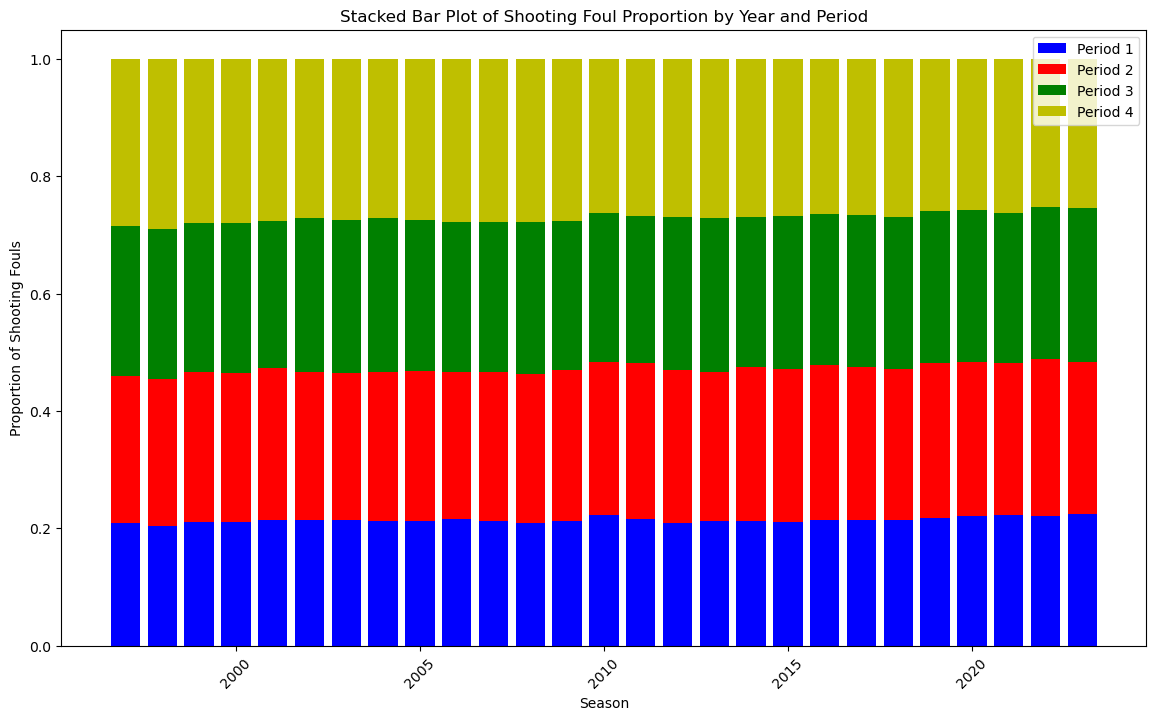

In [134]:
make_stacked_bar_plot(shooting_df_ungrouped, "Proportion of Shooting Fouls", "Stacked Bar Plot of Shooting Foul Proportion by Year and Period")

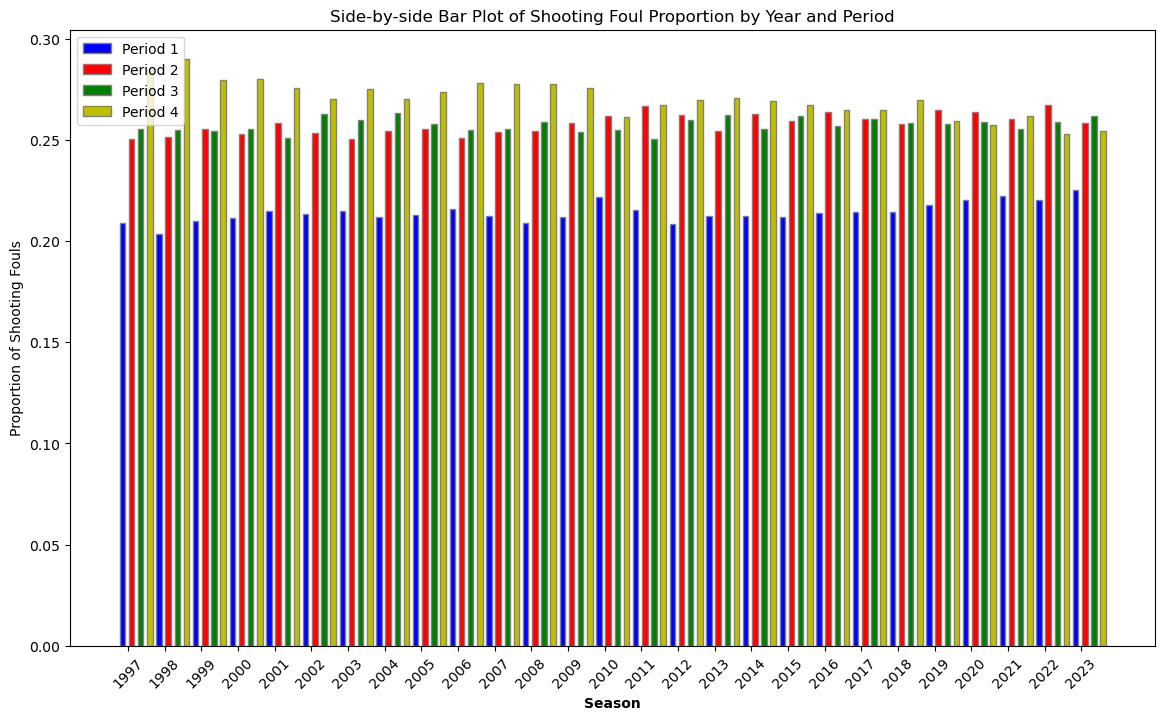

In [135]:
make_sbs_bar_plot(shooting_df_ungrouped, "Proportion of Shooting Fouls", "Side-by-side Bar Plot of Shooting Foul Proportion by Year and Period")

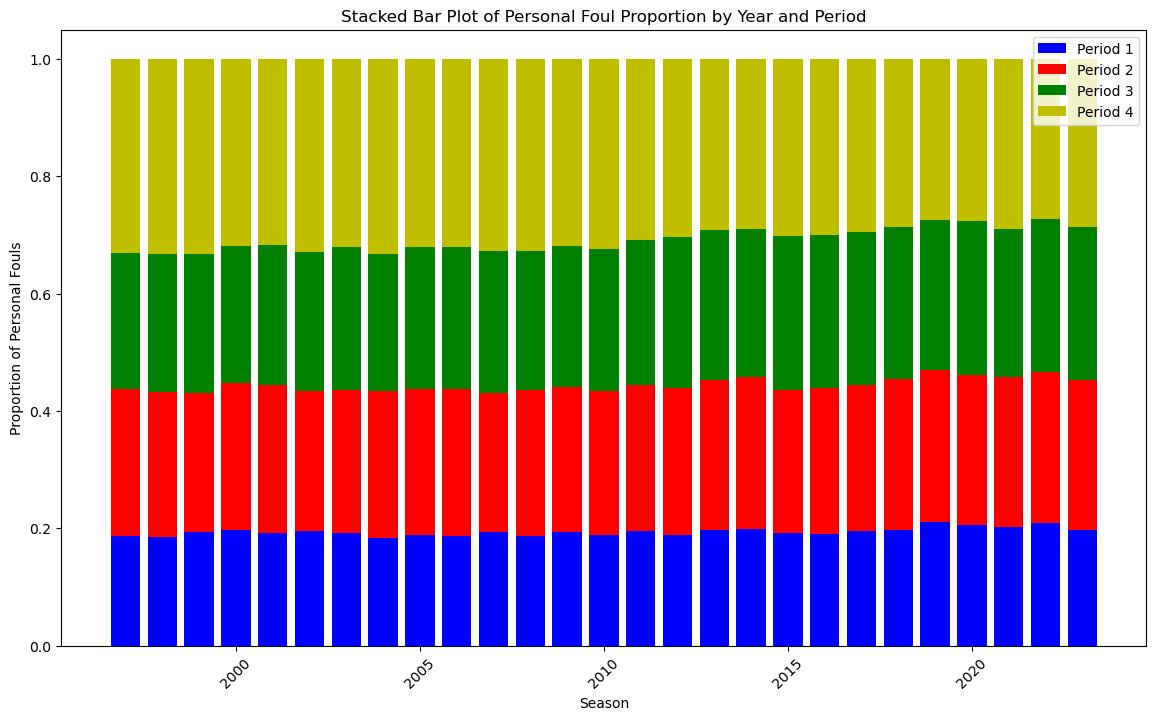

In [136]:
make_stacked_bar_plot(personal_df_ungrouped, "Proportion of Personal Fouls", "Stacked Bar Plot of Personal Foul Proportion by Year and Period")

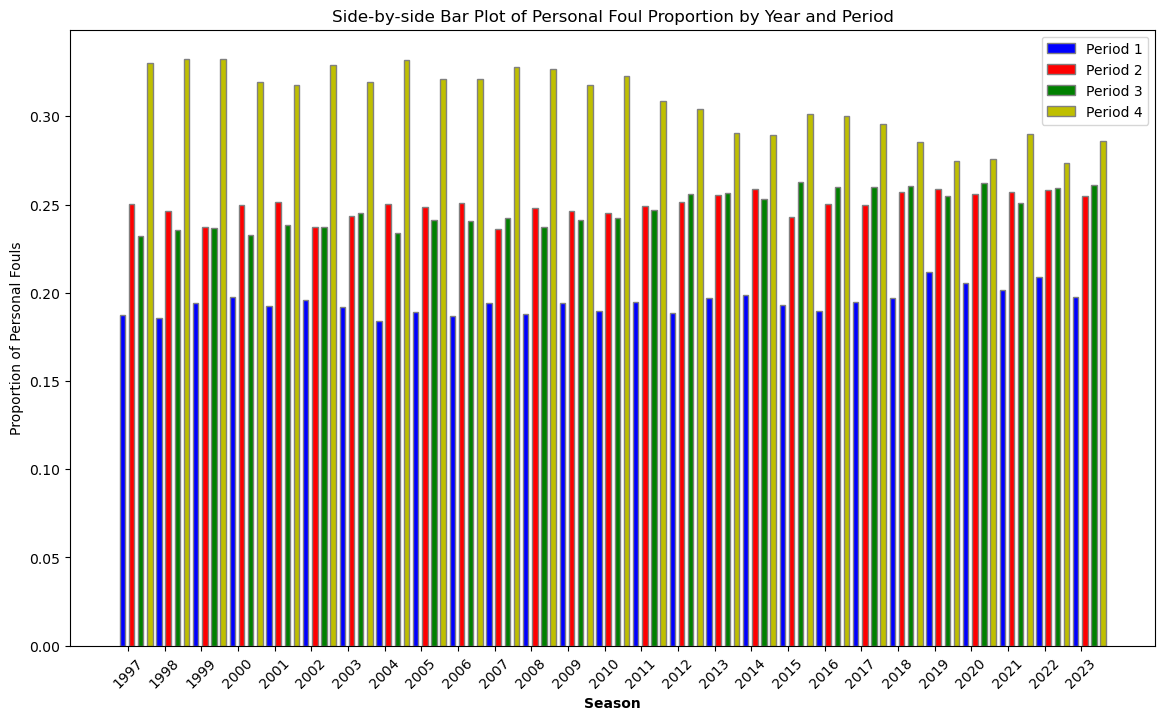

In [137]:
make_sbs_bar_plot(personal_df_ungrouped, "Proportion of Personal Fouls", "Side-by-side Bar Plot of Personal Foul Proportion by Year and Period")